In [2]:
import pandas as pd

from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.columns=['id','Temp_1','LocPr_1','WinSp_1','WinSp_2','Rain_1','SeaPr_1','LocPr_2','Temp_2','SeaPr_2','SeaPr_3','Rain_2','Insol_1','Humid_1','WinDi_1','Insol_2','WinDi_2','Insol_3','WinDi_3','WinSp_3','Insol_4','Humid_2','Rain_3','LocPr_3','SeaPr_4','WinSp_4','WinDi_4','WinSp_5','LocPr_4','Temp_3','LocPr_5','Humid_3','Temp_4','Temp_5','SeaPr_5','Insol_5','WinDi_5','Rain_4','Humid_4','Humid_5','Rain_5','Y00','Y01','Y02',"y03",'Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18']
# test.columns = all_data.columns = ['id','Temp_1','LocPr_1','WinSp_1','WinSp_2','Rain_1','SeaPr_1','LocPr_2','Temp_2','SeaPr_2','SeaPr_3','Rain_2','Insol_1','Humid_1','WinDi_1','Insol_2','WinDi_2','Insol_3','WinDi_3','WidSp_3','Insol_4','Humid_2','Rain_3','LocPr_3','SeaPr_4','WinSp_4','WinDi_4','WinSp_5','LocPr_4','Temp_3','LocPr_5','Humid_3','Temp_4','Temp_5','SeaPr_5','Insol_5','WinDi_5','Rain_4','Humid_4','Humid_5','Rain_5','Y00','Y01','Y02',"y03",'Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18']
# all_data.columns = ['id','Temp_1','LocPr_1','WinSp_1','WinSp_2','Rain_1','SeaPr_1','LocPr_2','Temp_2','SeaPr_2','SeaPr_3','Rain_2','Insol_1','Humid_1','WinDi_1','Insol_2','WinDi_2','Insol_3','WinDi_3','WidSp_3','Insol_4','Humid_2','Rain_3','LocPr_3','SeaPr_4','WinSp_4','WinDi_4','WinSp_5','LocPr_4','Temp_3','LocPr_5','Humid_3','Temp_4','Temp_5','SeaPr_5','Insol_5','WinDi_5','Rain_4','Humid_4','Humid_5','Rain_5','Y00','Y01','Y02',"y03",'Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18']
train = train.drop(columns=['Insol_2','Insol_3','Insol_4'])
train = train[['id','Temp_1','Temp_2','Temp_3','Temp_4','Temp_5','LocPr_1','LocPr_2','LocPr_3','LocPr_4','LocPr_5','SeaPr_1','SeaPr_2','SeaPr_3','SeaPr_4','SeaPr_5',
               'WinSp_1','WinSp_2','WinSp_3','WinSp_4','WinSp_5','WinDi_1','WinDi_2','WinDi_3','WinDi_4','WinDi_5',
               'Rain_1','Rain_2','Rain_3','Rain_4','Rain_5','Insol_1','Insol_5',
              'Humid_1','Humid_2','Humid_3','Humid_4','Humid_5',
              'Y00','Y01','Y02',"y03",'Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18']]

In [5]:
train.columns

Index(['id', 'Temp_1', 'Temp_2', 'Temp_3', 'Temp_4', 'Temp_5', 'LocPr_1',
       'LocPr_2', 'LocPr_3', 'LocPr_4', 'LocPr_5', 'SeaPr_1', 'SeaPr_2',
       'SeaPr_3', 'SeaPr_4', 'SeaPr_5', 'WinSp_1', 'WinSp_2', 'WinSp_3',
       'WinSp_4', 'WinSp_5', 'WinDi_1', 'WinDi_2', 'WinDi_3', 'WinDi_4',
       'WinDi_5', 'Rain_1', 'Rain_2', 'Rain_3', 'Rain_4', 'Rain_5', 'Insol_1',
       'Insol_5', 'Humid_1', 'Humid_2', 'Humid_3', 'Humid_4', 'Humid_5', 'Y00',
       'Y01', 'Y02', 'y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10',
       'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18'],
      dtype='object')

In [6]:
train.to_csv('train_for_EDA.csv')

# 칼럼 설명

### n은 비특정 센서의 위치(어디 좌표인지 모름)
### id : 고유번호, 시간순
### Temp_n : 현지 온도
### LocPr_n : 현지 기압
### WinSp_n : 풍속
### Rain_n : 일일 누적강수량
### SeaPr_n : 해면기압
### Insol_n : 일일 누적일사량
### Humid_n : 습도
### WinDi_n : 풍향
### Y00~Y17 : 센서측정온도

In [7]:
train.Rain_1.unique()

array([ 0. ,  0.1,  0.2,  0.5,  0.6,  0.8,  1. ,  1.3,  1.9,  2.5,  3.2,
        3.6,  4. ,  4.7,  5.5,  6.3,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,
        8. ,  8.1,  8.2,  8.6,  9.1,  9.2,  9.3,  9.4,  9.7, 10. , 10.3,
       10.6, 10.8, 11.4, 11.6, 11.8, 11.9, 12. , 12.2, 12.4, 12.5, 12.6,
       12.8, 12.9, 13.1, 13.3, 13.4, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4,  1.2,  1.6,  2.2,  2.8,  4.1,  4.8,  5.4,  5.6,
        5.9,  6.5,  7.5, 11. , 11.7, 13. , 13.2, 14.5, 15.1, 15.2, 15.6,
        1.4,  2. ,  3.8,  4.5,  7.7, 10.1, 12.3, 15. , 15.4, 16.2, 17.2,
       18. , 18.6, 19.3, 19.7, 20.4, 20.9, 21. , 21.2, 21.5, 21.9, 22.1,
       22.3, 22.5, 22.7, 22.8, 22.9, 23.1, 23.3, 23.6, 24. , 24.3, 24.4,
       24.6, 24.7, 24.8, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6,  0.4,
        0.9,  3.5,  5.3,  6. ,  8.5,  8.9,  9. ,  6.1,  6.9,  7.9,  8.4,
       10.7, 11.1])

## 그룹 지정

In [8]:
Temperature = ['Temp_1','Temp_2','Temp_3','Temp_4','Temp_5']
Localpressure = ['LocPr_1','LocPr_2','LocPr_3','LocPr_4','LocPr_5']
Windspeed = ['WinSp_1','WinSp_2','WinSp_3','WinSp_4','WinSp_5']
Rain = ['Rain_1','Rain_2','Rain_3','Rain_4','Rain_5']
Seapressure = ['SeaPr_1','SeaPr_2','SeaPr_3','SeaPr_4','SeaPr_5']
Insolation = ['Insol_1','Insol_2','Insol_3','Insol_4','Insol_5']
Humid = ['Humid_1','Humid_2','Humid_3','Humid_4','Humid_5']
Winddirection = ['WinDi_1','WinDi_2','WinDi_3','WinDi_4','WinDi_5']

## 비온날은 1 / 비오지 않은 날은 0인 열 추가

In [9]:
train['Rain_or'] = 0

In [10]:
train.columns

Index(['id', 'Temp_1', 'Temp_2', 'Temp_3', 'Temp_4', 'Temp_5', 'LocPr_1',
       'LocPr_2', 'LocPr_3', 'LocPr_4', 'LocPr_5', 'SeaPr_1', 'SeaPr_2',
       'SeaPr_3', 'SeaPr_4', 'SeaPr_5', 'WinSp_1', 'WinSp_2', 'WinSp_3',
       'WinSp_4', 'WinSp_5', 'WinDi_1', 'WinDi_2', 'WinDi_3', 'WinDi_4',
       'WinDi_5', 'Rain_1', 'Rain_2', 'Rain_3', 'Rain_4', 'Rain_5', 'Insol_1',
       'Insol_5', 'Humid_1', 'Humid_2', 'Humid_3', 'Humid_4', 'Humid_5', 'Y00',
       'Y01', 'Y02', 'y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10',
       'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18', 'Rain_or'],
      dtype='object')

# EDA 시작

### 전처리

In [11]:
train = pd.read_csv('train_for_EDA.csv')

In [12]:
train

,Unnamed: 0,id,Temp_1,Temp_2,Temp_3,Temp_4,Temp_5,LocPr_1,LocPr_2,LocPr_3,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,0,9.7,12.2,12.3,8.2,10.7,988.8,989.6,1002.5,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,1,9.3,12.1,12.1,8.3,10.3,988.9,989.6,1002.5,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,2,9.4,12.1,12.1,8.0,9.7,989.0,989.7,1002.4,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,3,9.4,12.0,12.1,7.7,9.4,988.9,989.6,1002.4,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,4,9.2,12.0,12.0,7.4,9.4,988.9,989.7,1002.4,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,4747,19.9,21.7,23.8,17.7,19.1,987.6,987.7,1000.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4748,4748,4748,19.9,21.6,23.6,17.7,19.2,987.6,987.7,1000.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4749,4749,4749,19.7,21.4,23.6,17.8,19.2,987.7,987.6,1000.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4750,4750,4750,19.4,21.3,23.3,17.7,19.3,987.7,987.8,1000.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5


In [13]:
train = train.drop(['Unnamed: 0'], axis = 'columns')

In [14]:
train

,id,Temp_1,Temp_2,Temp_3,Temp_4,Temp_5,LocPr_1,LocPr_2,LocPr_3,LocPr_4,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,12.2,12.3,8.2,10.7,988.8,989.6,1002.5,1008.7,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,12.1,12.1,8.3,10.3,988.9,989.6,1002.5,1008.7,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,12.1,12.1,8.0,9.7,989.0,989.7,1002.4,1008.6,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,12.0,12.1,7.7,9.4,988.9,989.6,1002.4,1008.7,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,12.0,12.0,7.4,9.4,988.9,989.7,1002.4,1008.7,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,19.9,21.7,23.8,17.7,19.1,987.6,987.7,1000.4,1006.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4748,4748,19.9,21.6,23.6,17.7,19.2,987.6,987.7,1000.3,1006.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4749,4749,19.7,21.4,23.6,17.8,19.2,987.7,987.6,1000.4,1006.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4750,4750,19.4,21.3,23.3,17.7,19.3,987.7,987.8,1000.4,1006.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5


In [15]:
train.describe()

,id,Temp_1,Temp_2,Temp_3,Temp_4,Temp_5,LocPr_1,LocPr_2,LocPr_3,LocPr_4,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
count,4752.00000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,...,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,432.000000
mean,2375.50000,20.227904,21.658081,22.079040,19.846528,20.012984,988.621107,989.005093,1001.773190,1007.554924,...,22.222801,23.737269,24.649653,23.641898,20.926157,21.319444,21.564468,22.969097,23.381829,26.687500
std,1371.92857,4.707570,4.377216,4.225203,5.520259,5.271630,3.359916,3.403714,3.367735,3.446475,...,9.112299,10.599000,12.214870,8.400081,6.106031,7.066149,6.810084,8.054272,9.275172,6.286621
min,0.00000,8.300000,11.600000,10.300000,5.300000,5.500000,977.300000,978.100000,990.800000,997.200000,...,3.500000,4.000000,3.000000,6.000000,7.500000,7.500000,7.000000,6.000000,7.000000,18.500000
25%,1187.75000,16.900000,18.400000,19.000000,16.000000,16.300000,986.800000,987.100000,999.900000,1005.500000,...,15.500000,15.500000,15.000000,17.000000,16.500000,16.500000,16.500000,16.500000,16.000000,21.000000
50%,2375.50000,19.900000,21.200000,21.700000,19.400000,19.600000,988.600000,989.100000,1001.900000,1007.700000,...,20.000000,20.500000,21.000000,22.000000,19.500000,19.500000,20.000000,21.500000,20.000000,25.000000
75%,3563.25000,24.100000,24.825000,25.200000,24.100000,24.100000,991.000000,991.600000,1004.200000,1010.200000,...,30.500000,32.500000,34.500000,30.500000,25.000000,25.000000,27.000000,30.000000,32.000000,31.500000
max,4751.00000,30.900000,32.700000,33.200000,33.100000,32.900000,997.200000,997.400000,1010.100000,1015.400000,...,42.000000,49.000000,53.000000,43.500000,38.000000,42.500000,40.500000,41.500000,43.500000,41.500000


##  시간대별 열 추가

In [16]:
time =pd.DataFrame(train.id.apply(lambda x:x%144))
time.columns = ['minute']
time['hour'] = time.minute.apply(lambda x:x//6+1)
time['day'] = time.index//144+1

# train = pd.concat([train,time],axis=1)

In [17]:
train = pd.concat([train,time],axis=1)

In [18]:
train.head()

,id,Temp_1,Temp_2,Temp_3,Temp_4,Temp_5,LocPr_1,LocPr_2,LocPr_3,LocPr_4,...,Y12,Y13,Y14,Y15,Y16,Y17,Y18,minute,hour,day
0,0,9.7,12.2,12.3,8.2,10.7,988.8,989.6,1002.5,1008.7,...,9.0,10.0,9.5,9.0,8.0,9.0,NaN,0,1,1
1,1,9.3,12.1,12.1,8.3,10.3,988.9,989.6,1002.5,1008.7,...,8.5,10.0,9.5,9.0,7.5,9.0,NaN,1,1,1
2,2,9.4,12.1,12.1,8.0,9.7,989.0,989.7,1002.4,1008.6,...,8.0,9.5,9.5,8.5,7.5,8.5,NaN,2,1,1
3,3,9.4,12.0,12.1,7.7,9.4,988.9,989.6,1002.4,1008.7,...,8.0,9.5,9.0,8.5,7.5,8.5,NaN,3,1,1
4,4,9.2,12.0,12.0,7.4,9.4,988.9,989.7,1002.4,1008.7,...,7.5,9.5,9.0,8.5,7.5,8.5,NaN,4,1,1


# 1. 기온

## 1.1) 일자별 기온 변화 추이

In [19]:
a = train.groupby('day')['Temp_1'].agg([('평균기온_1', 'mean')]).reset_index()

In [20]:
b = train.groupby('day')['Temp_2'].agg([('평균기온_2', 'mean')]).reset_index()

In [21]:
c = train.groupby('day')['Temp_3'].agg([('평균기온_3', 'mean')]).reset_index()

In [22]:
d = train.groupby('day')['Temp_4'].agg([('평균기온_4', 'mean')]).reset_index()

In [23]:
e = train.groupby('day')['Temp_5'].agg([('평균기온_5', 'mean')]).reset_index()

In [24]:
temp_day = pd.merge(a,b, left_on = 'day', right_on = 'day', how = 'left')
temp_day = pd.merge(temp_day,c, left_on = 'day', right_on = 'day', how = 'left')
temp_day = pd.merge(temp_day,d, left_on = 'day', right_on = 'day', how = 'left')
temp_day = pd.merge(temp_day,e, left_on = 'day', right_on = 'day', how = 'left')

In [25]:
temp_day

,day,평균기온_1,평균기온_2,평균기온_3,평균기온_4,평균기온_5
0,1,15.938194,17.679861,17.801389,14.962500,15.740972
1,2,18.106944,20.536111,20.692361,17.138889,18.697917
2,3,20.927083,22.909722,23.191667,19.010417,19.846528
3,4,21.520139,24.206250,25.123611,21.811806,22.053472
4,5,21.058333,23.980556,24.436806,21.906944,21.707639
5,6,22.952778,24.549306,25.417361,21.931944,22.523611
6,7,17.432639,18.522917,18.924306,17.671528,17.654167
7,8,16.727778,17.509722,18.832639,16.318750,15.809722
8,9,18.281944,20.079167,20.783333,17.490972,17.583333
9,10,18.550694,20.260417,20.529167,17.913194,17.903472


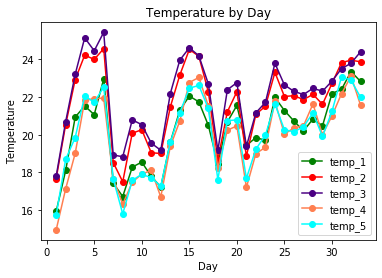

In [26]:
plt.plot(temp_day.day, temp_day.평균기온_1, color = 'green', marker = 'o', linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_2, color = 'red', marker = 'o', linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_3, color = 'indigo', marker = 'o', linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_4, color = 'coral', marker = 'o', linestyle = 'solid')
plt.plot(temp_day.day, temp_day.평균기온_5, color = 'aqua', marker = 'o', linestyle = 'solid')

plt.xlabel('Day')
plt.ylabel('Temperature')

plt.legend(['temp_1','temp_2','temp_3','temp_4','temp_5',])

plt.title('Temperature by Day')

plt.show()

## 1.2) 시간별 기온 변화 추이

In [34]:
a = train.groupby('hour')['Temp_1'].agg([('평균기온_1', 'mean')]).reset_index()
b = train.groupby('hour')['Temp_2'].agg([('평균기온_2', 'mean')]).reset_index()
c = train.groupby('hour')['Temp_3'].agg([('평균기온_3', 'mean')]).reset_index()
d = train.groupby('hour')['Temp_4'].agg([('평균기온_4', 'mean')]).reset_index()
e = train.groupby('hour')['Temp_5'].agg([('평균기온_5', 'mean')]).reset_index()

In [35]:
temp_hour = pd.merge(a,b, left_on = 'hour', right_on = 'hour', how = 'left')
temp_hour = pd.merge(temp_hour,c, left_on = 'hour', right_on = 'hour', how = 'left')
temp_hour = pd.merge(temp_hour,d, left_on = 'hour', right_on = 'hour', how = 'left')
temp_hour = pd.merge(temp_hour,e, left_on = 'hour', right_on = 'hour', how = 'left')

In [36]:
temp_hour

,hour,평균기온_1,평균기온_2,평균기온_3,평균기온_4,평균기온_5
0,1,16.494949,18.836364,19.493939,15.523232,16.129798
1,2,16.069192,18.272222,18.833333,14.974747,15.398990
2,3,15.689394,17.788384,18.253030,14.380303,14.867172
3,4,15.294949,17.378788,17.830303,13.913131,14.361616
4,5,14.959091,16.894949,17.485859,13.500505,13.869697
5,6,14.867677,16.568687,17.284848,13.342424,13.669697
6,7,15.588384,16.915657,17.647475,14.168182,14.499495
7,8,17.046465,18.133838,18.512121,16.112626,16.282323
8,9,18.995455,19.737374,19.877273,18.496465,18.547980
9,10,20.947475,21.414646,21.459091,20.653030,20.928788


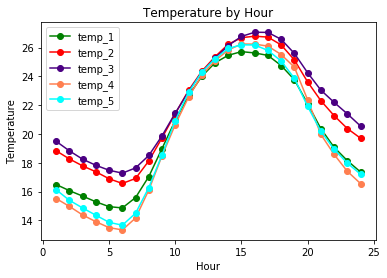

In [37]:
plt.plot(temp_hour.hour, temp_hour.평균기온_1, color = 'green', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_2, color = 'red', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_3, color = 'indigo', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_4, color = 'coral', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_5, color = 'aqua', marker = 'o', linestyle = 'solid')

plt.xlabel('Hour')
plt.ylabel('Temperature')

plt.legend(['temp_1','temp_2','temp_3','temp_4','temp_5',])

plt.title('Temperature by Hour')

plt.show()

## 1.3) 기온 데이터의 분포

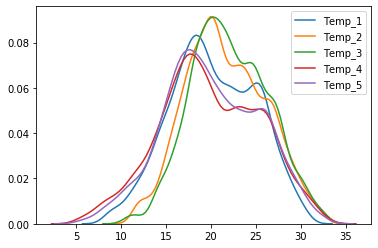

In [38]:
sns.kdeplot(train['Temp_1'])
sns.kdeplot(train['Temp_2'])
sns.kdeplot(train['Temp_3'])
sns.kdeplot(train['Temp_4'])
sns.kdeplot(train['Temp_5'])

plt.show()

# 2. 기압 (ATM)

## 2-1) 기압의 분포

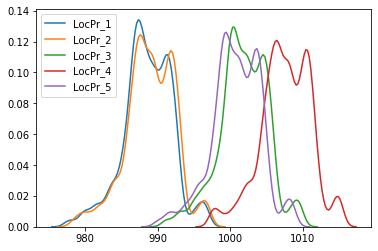

In [42]:
sns.kdeplot(train['LocPr_1'])
sns.kdeplot(train['LocPr_2'])
sns.kdeplot(train['LocPr_3'])
sns.kdeplot(train['LocPr_4'])
sns.kdeplot(train['LocPr_5'])

plt.show()

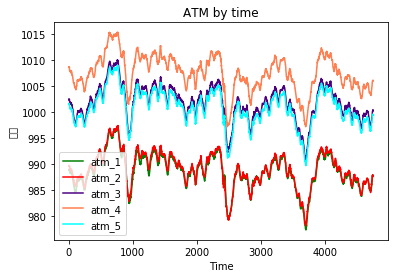

In [48]:
plt.plot(train.id, train.LocPr_1, color = 'green', linestyle = 'solid')
plt.plot(train.id, train.LocPr_2, color = 'red', linestyle = 'solid')
plt.plot(train.id, train.LocPr_3, color = 'indigo',linestyle = 'solid')
plt.plot(train.id, train.LocPr_4, color = 'coral', linestyle = 'solid')
plt.plot(train.id, train.LocPr_5, color = 'aqua', linestyle = 'solid')

plt.xlabel('Time')
plt.ylabel('기압')

plt.legend(['atm_1','atm_2','atm_3','atm_4','atm_5',])

plt.title('ATM by time')

plt.show()

# 3. 풍속

## 3.1) 풍속의 분포

### 풍속은 시간에 따른 변화가 두드러지며 특이값이 존재함

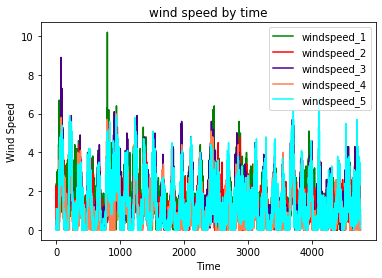

In [56]:
plt.plot(train.id, train.WinSp_1, color = 'green', linestyle = 'solid')
plt.plot(train.id, train.WinSp_2, color = 'red', linestyle = 'solid')
plt.plot(train.id, train.WinSp_3, color = 'indigo',linestyle = 'solid')
plt.plot(train.id, train.WinSp_4, color = 'coral', linestyle = 'solid')
plt.plot(train.id, train.WinSp_5, color = 'aqua', linestyle = 'solid')

plt.xlabel('Time')
plt.ylabel('Wind Speed')

plt.legend(['windspeed_1','windspeed_2','windspeed_3','windspeed_4','windspeed_5',])

plt.title('wind speed by time')

plt.show()

# 4. 일일 누적강수량

## 4.1) 시간의 흐름에 따른 강수

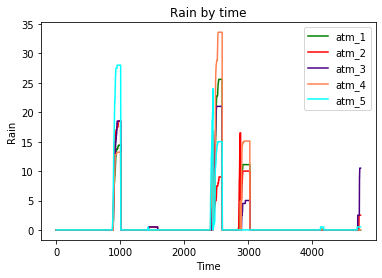

In [58]:
plt.plot(train.id, train.Rain_1, color = 'green', linestyle = 'solid')
plt.plot(train.id, train.Rain_2, color = 'red', linestyle = 'solid')
plt.plot(train.id, train.Rain_3, color = 'indigo',linestyle = 'solid')
plt.plot(train.id, train.Rain_4, color = 'coral', linestyle = 'solid')
plt.plot(train.id, train.Rain_5, color = 'aqua', linestyle = 'solid')

plt.xlabel('Time')
plt.ylabel('Rain')

plt.legend(['atm_1','atm_2','atm_3','atm_4','atm_5',])

plt.title('Rain by time')

plt.show()

## 4.2) 일별 강수량

In [61]:
a = train.groupby('day')['Rain_1'].agg([('Rain_day_1', 'mean')]).reset_index()
b = train.groupby('day')['Rain_2'].agg([('Rain_day_2', 'mean')]).reset_index()
c = train.groupby('day')['Rain_3'].agg([('Rain_day_3', 'mean')]).reset_index()
d = train.groupby('day')['Rain_4'].agg([('Rain_day_4', 'mean')]).reset_index()
e = train.groupby('day')['Rain_5'].agg([('Rain_day_5', 'mean')]).reset_index()

In [63]:
rain_day = pd.merge(a,b, left_on = 'day', right_on = 'day', how = 'left')
rain_day = pd.merge(rain_day,c, left_on = 'day', right_on = 'day', how = 'left')
rain_day = pd.merge(rain_day,d, left_on = 'day', right_on = 'day', how = 'left')
rain_day = pd.merge(rain_day,e, left_on = 'day', right_on = 'day', how = 'left')

In [64]:
rain_day

,day,Rain_day_1,Rain_day_2,Rain_day_3,Rain_day_4,Rain_day_5
0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,0.000000,0.000000,0.000000,0.000000,0.000000
5,6,0.000000,0.000000,0.000000,0.000000,0.000000
6,7,9.674306,12.868056,12.187500,9.392361,20.305556
7,8,0.000000,0.000000,0.000000,0.000000,0.000000
8,9,0.000000,0.000000,0.000000,0.000000,0.000000
9,10,0.001389,0.000000,0.000000,0.001389,0.006944


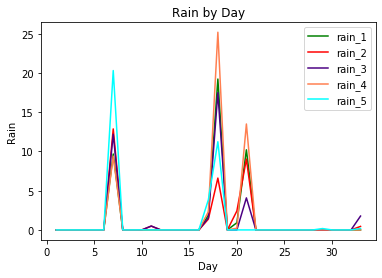

In [68]:
plt.plot(rain_day.day, rain_day.Rain_day_1, color = 'green', linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_2, color = 'red', linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_3, color = 'indigo',linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_4, color = 'coral', linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_5, color = 'aqua', linestyle = 'solid')

plt.xlabel('Day')
plt.ylabel('Rain')

plt.legend(['rain_1','rain_2','rain_3','rain_4','rain_5',])

plt.title('Rain by Day')

plt.show()

# 5. 해면기압

## 5.1)해면기압의 분포

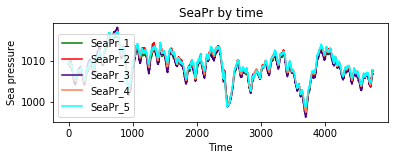

In [75]:
plt.subplot(2,1,1)
plt.plot(train.id, train.SeaPr_1, color = 'green', linestyle = 'solid')
plt.plot(train.id, train.SeaPr_2, color = 'red', linestyle = 'solid')
plt.plot(train.id, train.SeaPr_3, color = 'indigo',linestyle = 'solid')
plt.plot(train.id, train.SeaPr_4, color = 'coral', linestyle = 'solid')
plt.plot(train.id, train.SeaPr_5, color = 'aqua', linestyle = 'solid')

plt.xlabel('Time')
plt.ylabel('Sea pressure')

plt.legend(['SeaPr_1','SeaPr_2','SeaPr_3','SeaPr_4','SeaPr_5',])

plt.title('SeaPr by time')

plt.show()

## 5.2) 해면기압과 기압의 분포

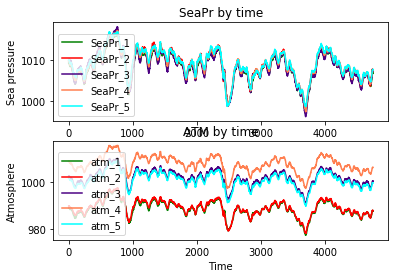

In [84]:
plt.subplot(2,1,1)

plt.plot(train.id, train.SeaPr_1, color = 'green', linestyle = 'solid')
plt.plot(train.id, train.SeaPr_2, color = 'red', linestyle = 'solid')
plt.plot(train.id, train.SeaPr_3, color = 'indigo',linestyle = 'solid')
plt.plot(train.id, train.SeaPr_4, color = 'coral', linestyle = 'solid')
plt.plot(train.id, train.SeaPr_5, color = 'aqua', linestyle = 'solid')

plt.xlabel('Time')
plt.ylabel('Sea pressure')

plt.legend(['SeaPr_1','SeaPr_2','SeaPr_3','SeaPr_4','SeaPr_5',])

plt.title('SeaPr by time')

plt.subplot(2,1,2)

plt.plot(train.id, train.LocPr_1, color = 'green', linestyle = 'solid')
plt.plot(train.id, train.LocPr_2, color = 'red', linestyle = 'solid')
plt.plot(train.id, train.LocPr_3, color = 'indigo',linestyle = 'solid')
plt.plot(train.id, train.LocPr_4, color = 'coral', linestyle = 'solid')
plt.plot(train.id, train.LocPr_5, color = 'aqua', linestyle = 'solid')

plt.xlabel('Time')
plt.ylabel('Atmosphere')

plt.legend(['atm_1','atm_2','atm_3','atm_4','atm_5',])

plt.title('ATM by time')



plt.show()

### Y Range 조정

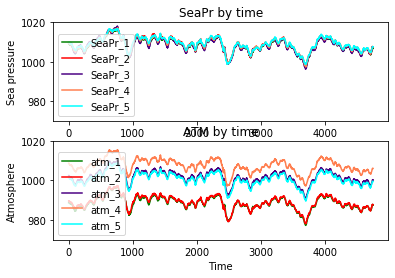

In [89]:
plt.subplot(2,1,1)

plt.ylim(970,1020)

plt.plot(train.id, train.SeaPr_1, color = 'green', linestyle = 'solid')
plt.plot(train.id, train.SeaPr_2, color = 'red', linestyle = 'solid')
plt.plot(train.id, train.SeaPr_3, color = 'indigo',linestyle = 'solid')
plt.plot(train.id, train.SeaPr_4, color = 'coral', linestyle = 'solid')
plt.plot(train.id, train.SeaPr_5, color = 'aqua', linestyle = 'solid')

plt.xlabel('Time')
plt.ylabel('Sea pressure')

plt.legend(['SeaPr_1','SeaPr_2','SeaPr_3','SeaPr_4','SeaPr_5',])

plt.title('SeaPr by time')

plt.subplot(2,1,2)

plt.ylim(970,1020)

plt.plot(train.id, train.LocPr_1, color = 'green', linestyle = 'solid')
plt.plot(train.id, train.LocPr_2, color = 'red', linestyle = 'solid')
plt.plot(train.id, train.LocPr_3, color = 'indigo',linestyle = 'solid')
plt.plot(train.id, train.LocPr_4, color = 'coral', linestyle = 'solid')
plt.plot(train.id, train.LocPr_5, color = 'aqua', linestyle = 'solid')

plt.xlabel('Time')
plt.ylabel('Atmosphere')

plt.legend(['atm_1','atm_2','atm_3','atm_4','atm_5',])

plt.title('ATM by time')

plt.show()

# 6. 일일 누적 일사량

### - 33개의 사이클 (33일)

### - 비오는날 일사량이 적음을 확인할 수 있다

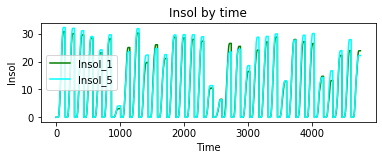

In [100]:
plt.subplot(2,1,1)
plt.plot(train.id, train.Insol_1, color = 'green', linestyle = 'solid')
# plt.plot(train.id, train.Insol_2, color = 'red', linestyle = 'solid')
# plt.plot(train.id, train.Insol_3, color = 'indigo',linestyle = 'solid')
# plt.plot(train.id, train.Insol_4, color = 'coral', linestyle = 'solid')
plt.plot(train.id, train.Insol_5, color = 'aqua', linestyle = 'solid')

plt.xlabel('Time')
plt.ylabel('Insol')

plt.legend(['Insol_1','Insol_5',])

plt.title('Insol by time')

plt.show()

# 7. 습도

## 7.1) 습도의 분포

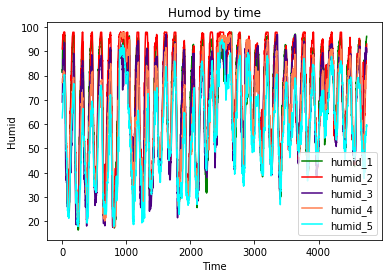

In [102]:
plt.plot(train.id, train.Humid_1, color = 'green', linestyle = 'solid')
plt.plot(train.id, train.Humid_2, color = 'red', linestyle = 'solid')
plt.plot(train.id, train.Humid_3, color = 'indigo',linestyle = 'solid')
plt.plot(train.id, train.Humid_4, color = 'coral', linestyle = 'solid')
plt.plot(train.id, train.Humid_5, color = 'aqua', linestyle = 'solid')

plt.xlabel('Time')
plt.ylabel('Humid')

plt.legend(['humid_1','humid_2','humid_3','humid_4','humid_5',])

plt.title('Humod by time')

plt.show()

## 7.2) 습도의 시간별 흐름

In [104]:
a = train.groupby('hour')['Humid_1'].agg([('humid_1', 'mean')]).reset_index()
b = train.groupby('hour')['Humid_2'].agg([('humid_2', 'mean')]).reset_index()
c = train.groupby('hour')['Humid_3'].agg([('humid_3', 'mean')]).reset_index()
d = train.groupby('hour')['Humid_4'].agg([('humid_4', 'mean')]).reset_index()
e = train.groupby('hour')['Humid_5'].agg([('humid_5', 'mean')]).reset_index()

In [105]:
humid_hour = pd.merge(a,b, left_on = 'hour', right_on = 'hour', how = 'left')
humid_hour = pd.merge(humid_hour,c, left_on = 'hour', right_on = 'hour', how = 'left')
humid_hour = pd.merge(humid_hour,d, left_on = 'hour', right_on = 'hour', how = 'left')
humid_hour = pd.merge(humid_hour,e, left_on = 'hour', right_on = 'hour', how = 'left')

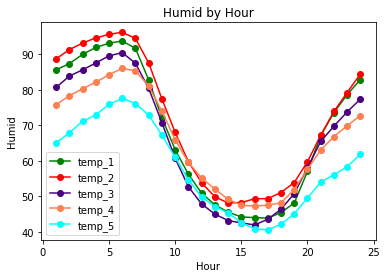

In [110]:
plt.plot(humid_hour.hour, humid_hour.humid_1, color = 'green', marker = 'o', linestyle = 'solid')
plt.plot(humid_hour.hour, humid_hour.humid_2, color = 'red', marker = 'o', linestyle = 'solid')
plt.plot(humid_hour.hour, humid_hour.humid_3, color = 'indigo', marker = 'o', linestyle = 'solid')
plt.plot(humid_hour.hour, humid_hour.humid_4, color = 'coral', marker = 'o', linestyle = 'solid')
plt.plot(humid_hour.hour, humid_hour.humid_5, color = 'aqua', marker = 'o', linestyle = 'solid')

plt.xlabel('Hour')
plt.ylabel('Humid')

plt.legend(['temp_1','temp_2','temp_3','temp_4','temp_5',])

plt.title('Humid by Hour')

plt.show()

## 7.3) 습도의 일별 편차

## 습도가 비교적 높은 날은 비온 날에 대응된다

In [124]:
a = train.groupby('day')['Humid_1'].agg([('humid_day_1', 'mean')]).reset_index()
b = train.groupby('day')['Humid_2'].agg([('humid_day_2', 'mean')]).reset_index()
c = train.groupby('day')['Humid_3'].agg([('humid_day_3', 'mean')]).reset_index()
d = train.groupby('day')['Humid_4'].agg([('humid_day_4', 'mean')]).reset_index()
e = train.groupby('day')['Humid_5'].agg([('humid_day_5', 'mean')]).reset_index()

In [125]:
humid_day = pd.merge(a,b, left_on = 'day', right_on = 'day', how = 'left')
humid_day = pd.merge(humid_day,c, left_on = 'day', right_on = 'day', how = 'left')
humid_day = pd.merge(humid_day,d, left_on = 'day', right_on = 'day', how = 'left')
humid_day = pd.merge(humid_day,e, left_on = 'day', right_on = 'day', how = 'left')

In [126]:
humid_day

,day,humid_day_1,humid_day_2,humid_day_3,humid_day_4,humid_day_5
0,1,59.593750,64.445833,51.895139,56.780556,50.175694
1,2,55.717361,60.722917,46.583333,49.090972,43.572917
2,3,59.653472,61.138889,50.970139,50.987500,43.736111
3,4,63.956944,67.535417,57.389583,57.843750,48.926389
4,5,56.870139,66.766667,54.611111,50.191667,44.447222
5,6,50.532639,56.212500,47.234028,46.695833,38.775694
6,7,86.090972,94.122917,84.029861,90.148611,80.265278
7,8,63.733333,62.340972,64.250000,64.323611,46.704861
8,9,58.625000,64.569444,59.047917,53.457639,41.911111
9,10,56.002083,64.768056,54.267361,54.421528,48.493750


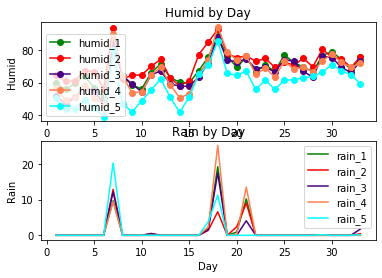

In [131]:
plt.subplot(2,1,1)

plt.plot(humid_day.day, humid_day.humid_day_1, color = 'green', marker = 'o', linestyle = 'solid')
plt.plot(humid_day.day, humid_day.humid_day_2, color = 'red', marker = 'o', linestyle = 'solid')
plt.plot(humid_day.day, humid_day.humid_day_3, color = 'indigo', marker = 'o', linestyle = 'solid')
plt.plot(humid_day.day, humid_day.humid_day_4, color = 'coral', marker = 'o', linestyle = 'solid')
plt.plot(humid_day.day, humid_day.humid_day_5, color = 'aqua', marker = 'o', linestyle = 'solid')

plt.xlabel('Day')
plt.ylabel('Humid')

plt.legend(['humid_1','humid_2','humid_3','humid_4','humid_5',])

plt.title('Humid by Day')

plt.subplot(2,1,2)

plt.plot(rain_day.day, rain_day.Rain_day_1, color = 'green', linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_2, color = 'red', linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_3, color = 'indigo',linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_4, color = 'coral', linestyle = 'solid')
plt.plot(rain_day.day, rain_day.Rain_day_5, color = 'aqua', linestyle = 'solid')

plt.xlabel('Day')
plt.ylabel('Rain')

plt.legend(['rain_1','rain_2','rain_3','rain_4','rain_5',])

plt.title('Rain by Day')

plt.show()

# 8. 풍향

# 모든 온도간의 시간대별 데이터의 상관관계 (Y00 ~ Y18, X 5곳)

In [180]:
temp_hour

,hour,평균기온_1,평균기온_2,평균기온_3,평균기온_4,평균기온_5
0,1,16.494949,18.836364,19.493939,15.523232,16.129798
1,2,16.069192,18.272222,18.833333,14.974747,15.398990
2,3,15.689394,17.788384,18.253030,14.380303,14.867172
3,4,15.294949,17.378788,17.830303,13.913131,14.361616
4,5,14.959091,16.894949,17.485859,13.500505,13.869697
5,6,14.867677,16.568687,17.284848,13.342424,13.669697
6,7,15.588384,16.915657,17.647475,14.168182,14.499495
7,8,17.046465,18.133838,18.512121,16.112626,16.282323
8,9,18.995455,19.737374,19.877273,18.496465,18.547980
9,10,20.947475,21.414646,21.459091,20.653030,20.928788


In [181]:
Temp_all = pd.merge(Ynn,temp_hour, left_on = 'hour', right_on = 'hour', how = 'left')

In [183]:
Temp_all

,hour,Temp_Y00,Temp_Y01,Temp_Y02,Temp_Y03,Temp_Y04,Temp_Y05,Temp_Y06,Temp_Y07,Temp_Y08,...,Temp_Y14,Temp_Y15,Temp_Y16,Temp_Y17,Temp_Y18,평균기온_1,평균기온_2,평균기온_3,평균기온_4,평균기온_5
0,1,19.113889,18.344444,18.436111,23.972222,23.997222,17.216667,16.072222,16.686111,16.661111,...,16.366667,16.152778,15.744444,15.813889,21.166667,16.494949,18.836364,19.493939,15.523232,16.129798
1,2,18.444444,17.405556,17.444444,23.302778,23.297222,16.519444,15.397222,16.008333,15.977778,...,15.777778,15.522222,15.033333,15.261111,20.722222,16.069192,18.272222,18.833333,14.974747,15.398990
2,3,17.855556,16.638889,16.644444,22.658333,22.627778,16.044444,14.925000,15.511111,15.438889,...,15.280556,15.005556,14.552778,14.775000,20.611111,15.689394,17.788384,18.253030,14.380303,14.867172
3,4,17.350000,15.927778,15.922222,22.097222,22.038889,15.433333,14.469444,15.041667,14.877778,...,14.883333,14.569444,13.963889,14.322222,20.333333,15.294949,17.378788,17.830303,13.913131,14.361616
4,5,16.838889,15.361111,15.313889,21.552778,21.480556,14.991667,14.102778,14.650000,14.450000,...,14.580556,14.244444,13.577778,14.047222,19.805556,14.959091,16.894949,17.485859,13.500505,13.869697
5,6,16.402778,14.922222,14.788889,21.058333,20.963889,14.819444,13.927778,14.469444,14.286111,...,14.400000,14.183333,13.541667,13.936111,19.361111,14.867677,16.568687,17.284848,13.342424,13.669697
6,7,16.283333,15.177778,15.125000,20.816667,20.683333,16.830556,15.433333,16.341667,15.680556,...,14.902778,15.072222,15.952778,14.916667,20.333333,15.588384,16.915657,17.647475,14.168182,14.499495
7,8,16.980556,16.544444,16.616667,20.838889,20.716667,20.697222,20.833333,21.072222,18.394444,...,16.430556,17.247222,20.891667,17.044444,22.944444,17.046465,18.133838,18.512121,16.112626,16.282323
8,9,18.275000,18.844444,19.238889,21.188889,21.113889,24.047222,25.941667,30.319444,20.863889,...,18.219444,19.997222,24.538889,20.472222,27.000000,18.995455,19.737374,19.877273,18.496465,18.547980
9,10,19.877778,22.533333,23.108333,21.875000,21.886111,26.655556,31.761111,36.722222,23.294444,...,20.169444,25.711111,27.411111,28.716667,29.194444,20.947475,21.414646,21.459091,20.653030,20.928788


In [184]:
Temp_all.corr()

,hour,Temp_Y00,Temp_Y01,Temp_Y02,Temp_Y03,Temp_Y04,Temp_Y05,Temp_Y06,Temp_Y07,Temp_Y08,...,Temp_Y14,Temp_Y15,Temp_Y16,Temp_Y17,Temp_Y18,평균기온_1,평균기온_2,평균기온_3,평균기온_4,평균기온_5
hour,1.000000,0.674052,0.561665,0.567914,0.745339,0.744143,0.402700,0.308052,0.243712,0.423428,...,0.502570,0.384687,0.377795,0.356372,0.314440,0.529612,0.586302,0.633245,0.542835,0.541260
Temp_Y00,0.674052,1.000000,0.970607,0.968862,0.918958,0.919146,0.844853,0.674454,0.571369,0.888537,...,0.939270,0.815912,0.800937,0.818068,0.760731,0.936448,0.975473,0.988382,0.943554,0.939871
Temp_Y01,0.561665,0.970607,1.000000,0.999300,0.801906,0.802091,0.927222,0.804635,0.708576,0.955317,...,0.971289,0.921979,0.911173,0.926999,0.886307,0.988207,0.997024,0.992106,0.988206,0.988756
Temp_Y02,0.567914,0.968862,0.999300,1.000000,0.796396,0.796378,0.928872,0.817687,0.724878,0.952278,...,0.965479,0.929748,0.917626,0.930147,0.892609,0.990155,0.997286,0.991639,0.989839,0.991496
Temp_Y03,0.745339,0.918958,0.801906,0.796396,1.000000,0.999716,0.590265,0.348072,0.231724,0.673021,...,0.769022,0.536237,0.506622,0.532389,0.467861,0.725022,0.811571,0.852114,0.740863,0.732064
Temp_Y04,0.744143,0.919146,0.802091,0.796378,0.999716,1.000000,0.589669,0.350082,0.234519,0.671873,...,0.770696,0.535115,0.506706,0.534701,0.467327,0.725726,0.812103,0.852533,0.741992,0.732826
Temp_Y05,0.402700,0.844853,0.927222,0.928872,0.590265,0.589669,1.000000,0.866307,0.796452,0.976119,...,0.941863,0.931650,0.959248,0.946014,0.898608,0.952187,0.930453,0.909625,0.946619,0.950706
Temp_Y06,0.308052,0.674454,0.804635,0.817687,0.348072,0.350082,0.866307,1.000000,0.982205,0.802605,...,0.755082,0.945134,0.960175,0.939347,0.942152,0.876743,0.807823,0.765284,0.866837,0.877435
Temp_Y07,0.243712,0.571369,0.708576,0.724878,0.231724,0.234519,0.796452,0.982205,1.000000,0.707398,...,0.657655,0.885868,0.903534,0.882364,0.875698,0.796009,0.716345,0.669328,0.786077,0.797981
Temp_Y08,0.423428,0.888537,0.955317,0.952278,0.673021,0.671873,0.976119,0.802605,0.707398,1.000000,...,0.976168,0.920377,0.929499,0.933955,0.891544,0.957473,0.952312,0.937582,0.952685,0.955133


In [197]:
Temp_all.columns

Index(['hour', 'Temp_Y00', 'Temp_Y01', 'Temp_Y02', 'Temp_Y03', 'Temp_Y04',
       'Temp_Y05', 'Temp_Y06', 'Temp_Y07', 'Temp_Y08', 'Temp_Y09', 'Temp_Y10',
       'Temp_Y11', 'Temp_Y12', 'Temp_Y13', 'Temp_Y14', 'Temp_Y15', 'Temp_Y16',
       'Temp_Y17', 'Temp_Y18', '평균기온_1', '평균기온_2', '평균기온_3', '평균기온_4',
       '평균기온_5'],
      dtype='object')

In [198]:
Temp_all_noid = Temp_all.drop(['hour'], axis = 'columns')

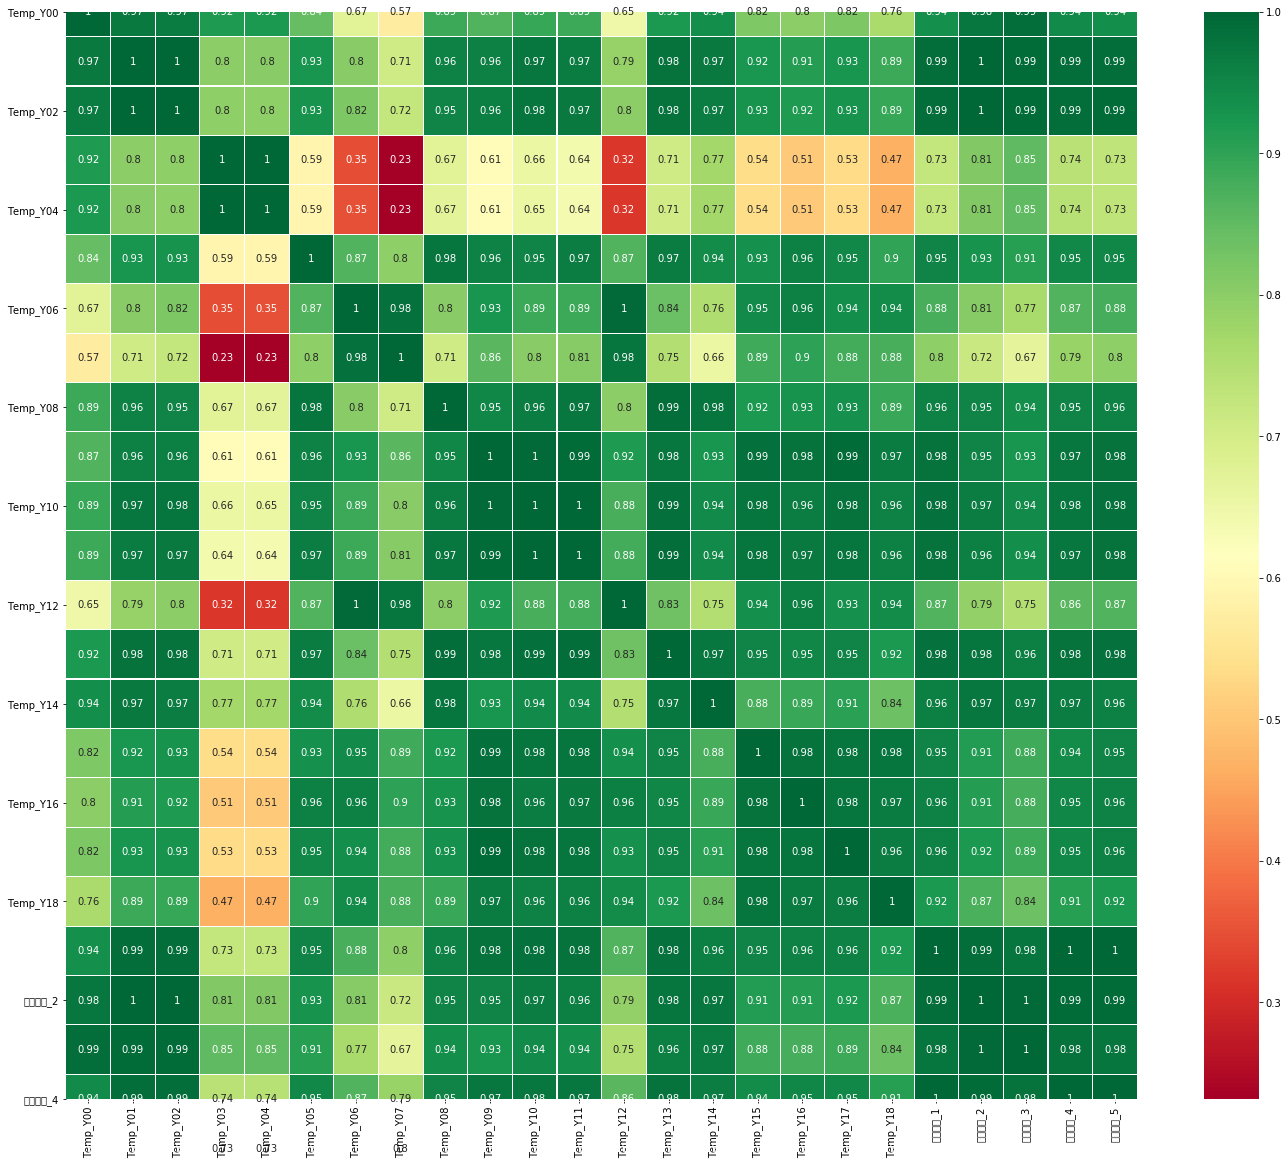

In [211]:
sns.heatmap(Temp_all_noid.corr(), annot=True ,cmap = 'RdYlGn', linewidths=0.1 )
fig=plt.gcf()
fig.set_size_inches(24,20)
plt.show()

## #  Y18은 매우 특이값으로 Y03, Y04와 낮은 관계를 보임

# 9. Y18

In [137]:
a = train.groupby('hour')['Y18'].agg([('Temp_Y18', 'mean')]).reset_index() ;a

,hour,Temp_Y18
0,1,21.166667
1,2,20.722222
2,3,20.611111
3,4,20.333333
4,5,19.805556
5,6,19.361111
6,7,20.333333
7,8,22.944444
8,9,27.000000
9,10,29.194444


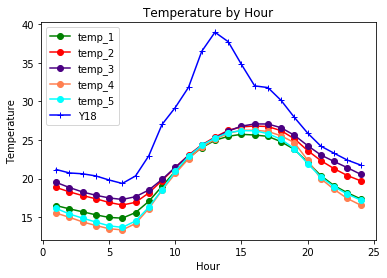

In [143]:
plt.plot(temp_hour.hour, temp_hour.평균기온_1, color = 'green', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_2, color = 'red', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_3, color = 'indigo', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_4, color = 'coral', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_5, color = 'aqua', marker = 'o', linestyle = 'solid')

plt.plot(a.hour, a.Temp_Y18, color = 'blue', marker = '+', linestyle = 'solid')

plt.xlabel('Hour')
plt.ylabel('Temperature')

plt.legend(['temp_1','temp_2','temp_3','temp_4','temp_5','Y18'])

plt.title('Temperature by Hour')

plt.show()

## Y00 ~ Y18 Temp by hour

In [171]:
b = train.groupby('hour')['Y00'].agg([('Temp_Y00', 'mean')]).reset_index()
c = train.groupby('hour')['Y01'].agg([('Temp_Y01', 'mean')]).reset_index()
d = train.groupby('hour')['Y02'].agg([('Temp_Y02', 'mean')]).reset_index()
e = train.groupby('hour')['y03'].agg([('Temp_Y03', 'mean')]).reset_index()
f = train.groupby('hour')['Y04'].agg([('Temp_Y04', 'mean')]).reset_index()
g = train.groupby('hour')['Y05'].agg([('Temp_Y05', 'mean')]).reset_index()
h = train.groupby('hour')['Y06'].agg([('Temp_Y06', 'mean')]).reset_index()
i = train.groupby('hour')['Y07'].agg([('Temp_Y07', 'mean')]).reset_index()
j = train.groupby('hour')['Y08'].agg([('Temp_Y08', 'mean')]).reset_index()
k = train.groupby('hour')['Y09'].agg([('Temp_Y09', 'mean')]).reset_index()
l = train.groupby('hour')['Y10'].agg([('Temp_Y10', 'mean')]).reset_index()
m = train.groupby('hour')['Y11'].agg([('Temp_Y11', 'mean')]).reset_index()
n = train.groupby('hour')['Y12'].agg([('Temp_Y12', 'mean')]).reset_index()
o = train.groupby('hour')['Y13'].agg([('Temp_Y13', 'mean')]).reset_index()
p = train.groupby('hour')['Y14'].agg([('Temp_Y14', 'mean')]).reset_index()
q = train.groupby('hour')['Y15'].agg([('Temp_Y15', 'mean')]).reset_index()
r = train.groupby('hour')['Y16'].agg([('Temp_Y16', 'mean')]).reset_index()
s = train.groupby('hour')['Y17'].agg([('Temp_Y17', 'mean')]).reset_index()
aa = train.groupby('hour')['Y18'].agg([('Temp_Y18', 'mean')]).reset_index()

In [172]:
Ynn = pd.merge(b,c, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,d, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,e, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,f, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,g, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,h, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,i, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,j, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,k, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,l, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,m, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,n, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,o, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,p, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,q, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,r, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,s, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn = pd.merge(Ynn,aa, left_on = 'hour', right_on = 'hour', how = 'left')
Ynn

,hour,Temp_Y00,Temp_Y01,Temp_Y02,Temp_Y03,Temp_Y04,Temp_Y05,Temp_Y06,Temp_Y07,Temp_Y08,Temp_Y09,Temp_Y10,Temp_Y11,Temp_Y12,Temp_Y13,Temp_Y14,Temp_Y15,Temp_Y16,Temp_Y17,Temp_Y18
0,1,19.113889,18.344444,18.436111,23.972222,23.997222,17.216667,16.072222,16.686111,16.661111,14.736111,15.461111,14.663889,16.066667,16.438889,16.366667,16.152778,15.744444,15.813889,21.166667
1,2,18.444444,17.405556,17.444444,23.302778,23.297222,16.519444,15.397222,16.008333,15.977778,13.925000,14.552778,13.694444,15.338889,15.838889,15.777778,15.522222,15.033333,15.261111,20.722222
2,3,17.855556,16.638889,16.644444,22.658333,22.627778,16.044444,14.925000,15.511111,15.438889,13.355556,13.883333,12.963889,14.838889,15.344444,15.280556,15.005556,14.552778,14.775000,20.611111
3,4,17.350000,15.927778,15.922222,22.097222,22.038889,15.433333,14.469444,15.041667,14.877778,12.797222,13.275000,12.330556,14.230556,14.908333,14.883333,14.569444,13.963889,14.322222,20.333333
4,5,16.838889,15.361111,15.313889,21.552778,21.480556,14.991667,14.102778,14.650000,14.450000,12.386111,12.802778,11.847222,13.869444,14.580556,14.580556,14.244444,13.577778,14.047222,19.805556
5,6,16.402778,14.922222,14.788889,21.058333,20.963889,14.819444,13.927778,14.469444,14.286111,12.197222,12.486111,11.561111,13.825000,14.466667,14.400000,14.183333,13.541667,13.936111,19.361111
6,7,16.283333,15.177778,15.125000,20.816667,20.683333,16.830556,15.433333,16.341667,15.680556,13.163889,13.055556,12.238889,17.522222,15.058333,14.902778,15.072222,15.952778,14.916667,20.333333
7,8,16.980556,16.544444,16.616667,20.838889,20.716667,20.697222,20.833333,21.072222,18.394444,15.619444,15.008333,14.872222,23.508333,16.661111,16.430556,17.247222,20.891667,17.044444,22.944444
8,9,18.275000,18.844444,19.238889,21.188889,21.113889,24.047222,25.941667,30.319444,20.863889,19.036111,18.125000,20.133333,28.608333,18.722222,18.219444,19.997222,24.538889,20.472222,27.000000
9,10,19.877778,22.533333,23.108333,21.875000,21.886111,26.655556,31.761111,36.722222,23.294444,25.925000,25.116667,26.394444,32.433333,20.744444,20.169444,25.711111,27.411111,28.716667,29.194444


# 10. Y00

In [145]:
b = train.groupby('hour')['Y00'].agg([('Temp_Y00', 'mean')]).reset_index() ;b

plt.plot(temp_hour.hour, temp_hour.평균기온_1, color = 'green', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_2, color = 'red', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_3, color = 'indigo', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_4, color = 'coral', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_5, color = 'aqua', marker = 'o', linestyle = 'solid')

plt.plot(b.hour, b.Temp_Y00, color = 'blue', marker = '+', linestyle = 'solid')

plt.xlabel('Hour')
plt.ylabel('Temperature')

plt.legend(['temp_1','temp_2','temp_3','temp_4','temp_5','Y00'])

plt.title('Temperature by Hour')

plt.show()

,hour,Temp_Y00
0,1,19.113889
1,2,18.444444
2,3,17.855556
3,4,17.350000
4,5,16.838889
5,6,16.402778
6,7,16.283333
7,8,16.980556
8,9,18.275000
9,10,19.877778


# 11. Y01

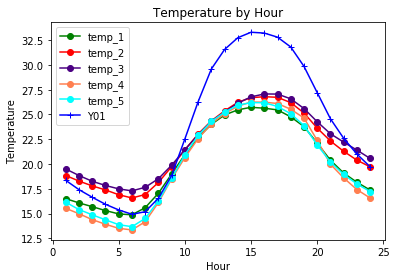

In [150]:
c = train.groupby('hour')['Y01'].agg([('Temp_Y01', 'mean')]).reset_index() ;b

plt.plot(temp_hour.hour, temp_hour.평균기온_1, color = 'green', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_2, color = 'red', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_3, color = 'indigo', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_4, color = 'coral', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_5, color = 'aqua', marker = 'o', linestyle = 'solid')

plt.plot(c.hour, c.Temp_Y01, color = 'blue', marker = '+', linestyle = 'solid')

plt.xlabel('Hour')
plt.ylabel('Temperature')

plt.legend(['temp_1','temp_2','temp_3','temp_4','temp_5','Y01'])

plt.title('Temperature by Hour')

plt.show()

# 12. Y02

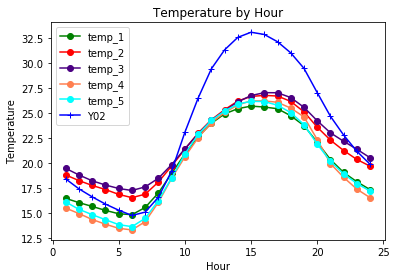

In [168]:
d = train.groupby('hour')['Y02'].agg([('Temp_Y02', 'mean')]).reset_index() ;b

plt.plot(temp_hour.hour, temp_hour.평균기온_1, color = 'green', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_2, color = 'red', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_3, color = 'indigo', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_4, color = 'coral', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_5, color = 'aqua', marker = 'o', linestyle = 'solid')

plt.plot(d.hour, d.Temp_Y02, color = 'blue', marker = '+', linestyle = 'solid')

plt.xlabel('Hour')
plt.ylabel('Temperature')

plt.legend(['temp_1','temp_2','temp_3','temp_4','temp_5','Y02'])

plt.title('Temperature by Hour')

plt.show()

# 13. Y03

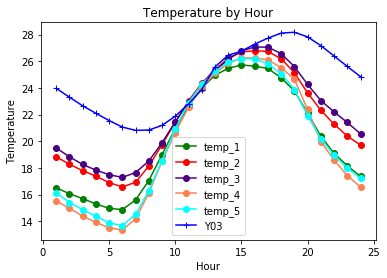

In [174]:
plt.plot(temp_hour.hour, temp_hour.평균기온_1, color = 'green', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_2, color = 'red', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_3, color = 'indigo', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_4, color = 'coral', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_5, color = 'aqua', marker = 'o', linestyle = 'solid')

plt.plot(Ynn.hour, Ynn.Temp_Y03, color = 'blue', marker = '+', linestyle = 'solid')

plt.xlabel('Hour')
plt.ylabel('Temperature')

plt.legend(['temp_1','temp_2','temp_3','temp_4','temp_5','Y03'])

plt.title('Temperature by Hour')

plt.show()

# 14. Y04

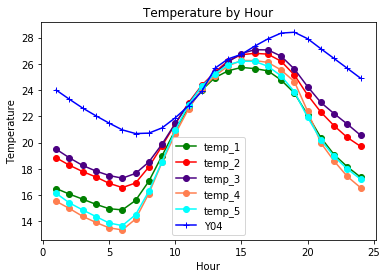

In [176]:
plt.plot(temp_hour.hour, temp_hour.평균기온_1, color = 'green', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_2, color = 'red', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_3, color = 'indigo', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_4, color = 'coral', marker = 'o', linestyle = 'solid')
plt.plot(temp_hour.hour, temp_hour.평균기온_5, color = 'aqua', marker = 'o', linestyle = 'solid')

plt.plot(Ynn.hour, Ynn.Temp_Y04, color = 'blue', marker = '+', linestyle = 'solid')

plt.xlabel('Hour')
plt.ylabel('Temperature')

plt.legend(['temp_1','temp_2','temp_3','temp_4','temp_5','Y04'])

plt.title('Temperature by Hour')

plt.show()

In [1]:
from sklearn.datasets import load_iris

In [7]:
import pandas as pd

In [3]:
iris = load_iris()

In [4]:
iris_data = iris.data

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)